In [2]:
import numpy as np
import matplotlib.pyplot as plt
from poke.writing import read_serial_to_rayfront
from poke.poke_core import Rayfront

# Displaying Footprint Diagrams and Ray OPDs
Footprint diagrams and OPD maps are (one of the many) important tools in any respectable ray tracer's toolkit. The footprint diagram is a simple map of the rays on a given surface, and the OPD map is the optical path experienced by each ray traced. Here we show how these data are accessible with Poke.

For now, we use an already traced Rayfront (for the EELT!) but this demo will later be updated with the ray tracing included. We begin by using the 

In [3]:
# Load a rayfront
pth_to_rf = '/Users/jashcraft/Desktop/poke/tests/ELT_rayfront_aspolarized_64rays_0.6um.msgpack'
rf = read_serial_to_rayfront(pth_to_rf)
display(rf.surfaces)

[{'surf': 1, 'coating': (1.2+7.115j), 'mode': 'reflect'},
 {'surf': 3, 'coating': (1.2+7.115j), 'mode': 'reflect'},
 {'surf': 5, 'coating': (1.2+7.115j), 'mode': 'reflect'},
 {'surf': 8, 'coating': (1.2+7.115j), 'mode': 'reflect'},
 {'surf': 12, 'coating': (1.2+7.115j), 'mode': 'reflect'}]

Great! The Rayfront was successfully loaded. Now we use the data attributes to generate a footprint diagram at M5 (the 4th surface in the surface list above)

In [4]:
x_m4,y_m4 = rf.xData[0,4],rf.yData[0,4]

Now we just do a scatterplot

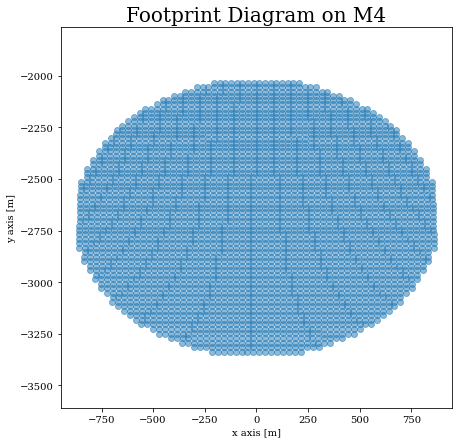

In [6]:
plt.figure(figsize=[7,7])
plt.scatter(x_m4,y_m4,marker='o',alpha=0.5)
plt.title('Footprint Diagram on M4')
plt.axis('equal')
plt.ylabel('y axis [m]')
plt.xlabel('x axis [m]')
plt.show()

Easy enough! Now let's plot the OPD v.s. the Entrance Pupil coordinates

In [23]:
# Grab the OPD
opd = np.copy(rf.opd[0,-1])
opd -= np.mean(opd)

# Grab the EP Coordinates
x_ep,y_ep = rf.xData[0,0],rf.yData[0,0]

Now it's just another scatterplot. Here the dimensions are in nm

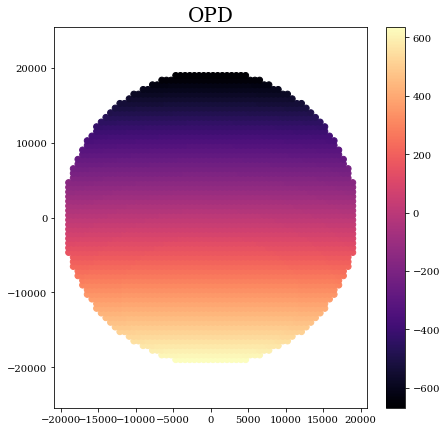

In [24]:
plt.figure(figsize=[7,7])
plt.scatter(x_ep,y_ep,c=opd)
plt.title('OPD')
plt.axis('equal')
plt.colorbar()
plt.show()